In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
columns = ['text', 'stats', 'date_time', 'report_link', 'city', 'state', 'shape', 
           'duration', 'summary', 'posted']

df=pd.read_csv('ufo_update.csv')

In [ ]:
df.head()

,text,stats,date_time,report_link,city,state,shape,duration,summary,posted
0,The background is a blue sky. The shape of th...,Occurred : 8/5/2020 10:15 (Entered as : 08/05...,8/5/20 10:15,http://www.nuforc.org/webreports/158/S158217.html,Ty Ty,GA,Unknown,5 minutes,The background is a blue sky. The shape of the...,8/6/20
1,Black polygonal craft with lights wobbling thr...,Occurred : 8/5/2020 18:50 (Entered as : 08/05...,8/5/20 18:50,http://www.nuforc.org/webreports/158/S158226.html,New Braunfels,TX,Chevron,2-3 minutes,Black polygonal craft with lights wobbling thr...,8/6/20
2,I observed a white ball of light flying from t...,Occurred : 8/4/2020 20:30 (Entered as : 08/04...,8/4/20 20:30,http://www.nuforc.org/webreports/158/S158228.html,Mesa,AZ,Circle,2 minutes,I observed a white ball of light flying from t...,8/6/20
3,High altitude fast moving delta shaped flames ...,Occurred : 8/4/2020 22:00 (Entered as : 08/04...,8/4/20 22:00,http://www.nuforc.org/webreports/158/S158221.html,Miami Beach,FL,Fireball,1 minute,High altitude fast moving delta shaped flames....,8/6/20
4,Three unmistakable lights moving at a speed th...,Occurred : 8/5/2020 04:33 (Entered as : 08/05...,8/5/20 04:33,http://www.nuforc.org/webreports/158/S158220.html,Pheonix,AZ,Triangle,3 seconds,Three unmistakable lights moving at a speed th...,8/6/20


In [ ]:
df.tail()

,text,stats,date_time,report_link,city,state,shape,duration,summary,posted
93812,North Redding California We saw a bright flas...,Occurred : 7/12/2019 09:20 (Entered as : 07/1...,7/12/19 09:20,http://www.nuforc.org/webreports/147/S147518.html,Redding,CA,Cylinder,5 minutes,"North Redding, CA. We saw a bright flashing w...",7/12/19
93813,Translucent ballon-like moving slowly Son noti...,Occurred : 6/19/2019 20:30 (Entered as : 6-19...,6/19/19 20:30,http://www.nuforc.org/webreports/146/S146940.html,Carlinville,IL,Sphere,30 minutes,Translucent ballon-like moving slowly,6/20/19
93814,15 STRANGE OVAL LIGHTS ABOVE THE LOW CLOUDS SO...,Occurred : 6/19/2019 22:20 (Entered as : 6-19...,6/19/19 22:20,http://www.nuforc.org/webreports/146/S146934.html,Orlando,FL,Oval,12 minutes,15 STRANGE OVAL LIGHTS ABOVE THE LOW CLOUDS SO...,6/20/19
93815,Multiple star-like objects triangle formation ...,Occurred : 6/19/2019 23:00 (Entered as : 06/1...,6/19/19 23:00,http://www.nuforc.org/webreports/146/S146942.html,Smithville,MO,Light,>1 hour,Multiple star-like objects triangle formation ...,6/20/19
93816,Translucent ballon-like moving slowly Son noti...,Occurred : 6/19/2019 20:30 (Entered as : 6-19...,6/19/19 20:30,http://www.nuforc.org/webreports/146/S146935.html,Carlinville,IL,Sphere,30 minutes,Translucent ballon-like moving slowly. ((anon...,6/20/19


In [ ]:
#No current use for posted feature

del df['posted']

In [ ]:
#Cleaning stats column to get a more accurate, 4 digit year
#Can I strip everyting after 14 characters?

df['stats'] = df['stats'].str.strip('Occurred : ')
start, stop, step = 0, 14, 1
df['stats'] = df['stats'].str.slice(start, stop, step)

In [ ]:
#convert 24:00 to 0:00, convert to datetime

df['stats'] = df['stats'].str.replace('24:00', '0:00') 

In [ ]:
#create date_time feature

df['date_time'] = pd.to_datetime(df['stats'], infer_datetime_format=True, errors='coerce')

In [ ]:
#create year and month feature

df['year'] = pd.DatetimeIndex(df['date_time']).year
df['month'] = pd.DatetimeIndex(df['date_time']).month
df['day'] = pd.DatetimeIndex(df['date_time']).day
df['weekday'] = pd.DatetimeIndex(df['date_time']).day_name()
df['hour'] = pd.DatetimeIndex(df['date_time']).hour

In [ ]:
#reducing number of coloumns

del df['summary']
del df['duration']
del df['stats']

In [ ]:
df.isna().sum()

text              57
date_time      17378
report_link        0
city             256
state           5459
shape           3171
year           17378
month          17378
day            17378
weekday        17378
hour           17378
dtype: int64

In [ ]:
#drop nans

df = df.dropna()

In [ ]:
#check shape, could probably drop less nans but I have a lot of data for
#text processing
df.shape

(69719, 11)

In [ ]:
df['year'] = df['year'].apply(int)

In [ ]:
df = df.sort_values(by='year', ignore_index=True)

In [ ]:
df.head(10)

,text,date_time,report_link,city,state,shape,year,month,day,weekday,hour
0,Two white dots at high altitude traveling very...,1721-04-25 21:03:00,http://www.nuforc.org/webreports/133/S133812.html,Dallas,GA,Unknown,1721,4.0,25.0,Friday,21.0
1,"Slow Moving Fireball, stench of burning sulphe...",1790-06-30 21:00:00,http://www.nuforc.org/webreports/057/S57309.html,Carlisle,NY,Fireball,1790,6.0,30.0,Wednesday,21.0
2,UFO report communicated by Thomas Jefferson Fr...,1800-04-05 20:00:00,http://www.nuforc.org/webreports/079/S79941.html,Baton Rouge,LA,Light,1800,4.0,5.0,Saturday,20.0
3,1861 airborne cross over lower manhattan attn:...,1861-03-29 00:00:00,http://www.nuforc.org/webreports/095/S95986.html,New York City (Manhattan),NY,Cross,1861,3.0,29.0,Friday,0.0
4,This is a UFO report by a respected Confederat...,1864-05-16 08:00:00,http://www.nuforc.org/webreports/132/S132800.html,Cave Spring,GA,Light,1864,5.0,16.0,Monday,8.0
5,"In 1864, prior to airplanes, a white object wa...",1864-05-16 08:00:00,http://www.nuforc.org/webreports/071/S71242.html,Cave Springs,GA,Unknown,1864,5.0,16.0,Monday,8.0
6,Old photos from 1871 show what appears to be o...,1871-06-30 14:00:00,http://www.nuforc.org/webreports/072/S72648.html,Yellowstone National Park,WY,Egg,1871,6.0,30.0,Friday,14.0
7,Slow moving cigar shaped airship crashed in Au...,1897-04-17 06:00:00,http://www.nuforc.org/webreports/088/S88780.html,Aurora,TX,Cigar,1897,4.0,17.0,Saturday,6.0
8,We saw a v shape craft or object that just hov...,1905-07-01 09:00:00,http://www.nuforc.org/webreports/153/S153637.html,Houston,TX,Triangle,1905,7.0,1.0,Saturday,9.0
9,"This ball made no sound, and I saw no power so...",1905-07-02 11:00:00,http://www.nuforc.org/webreports/082/S82465.html,Sun Valley,NV,Other,1905,7.0,2.0,Sunday,11.0


In [ ]:
df.isna().sum()

text           0
date_time      0
report_link    0
city           0
state          0
shape          0
year           0
month          0
day            0
weekday        0
hour           0
dtype: int64

In [ ]:
df.tail()

,text,date_time,report_link,city,state,shape,year,month,day,weekday,hour
69714,For the last 2 weeks this object has been coni...,2020-03-18 22:00:00,http://www.nuforc.org/webreports/154/S154280.html,Vancouver,WA,Unknown,2020,3.0,18.0,Wednesday,22.0
69715,My sister and I were at the edge of town takin...,2020-03-18 21:00:00,http://www.nuforc.org/webreports/154/S154288.html,Cochrane (Canada),ON,Formation,2020,3.0,18.0,Wednesday,21.0
69716,"Bright orange lights above Clearlake, CA I wit...",2020-03-18 20:04:00,http://www.nuforc.org/webreports/154/S154283.html,Clearlake,CA,Fireball,2020,3.0,18.0,Wednesday,20.0
69717,Steady bright object at sunset in western sky ...,2020-06-11 19:02:00,http://www.nuforc.org/webreports/156/S156997.html,Bartlett,IL,Light,2020,6.0,11.0,Thursday,19.0
69718,The background is a blue sky. The shape of th...,2020-08-05 10:15:00,http://www.nuforc.org/webreports/158/S158217.html,Ty Ty,GA,Unknown,2020,8.0,5.0,Wednesday,10.0


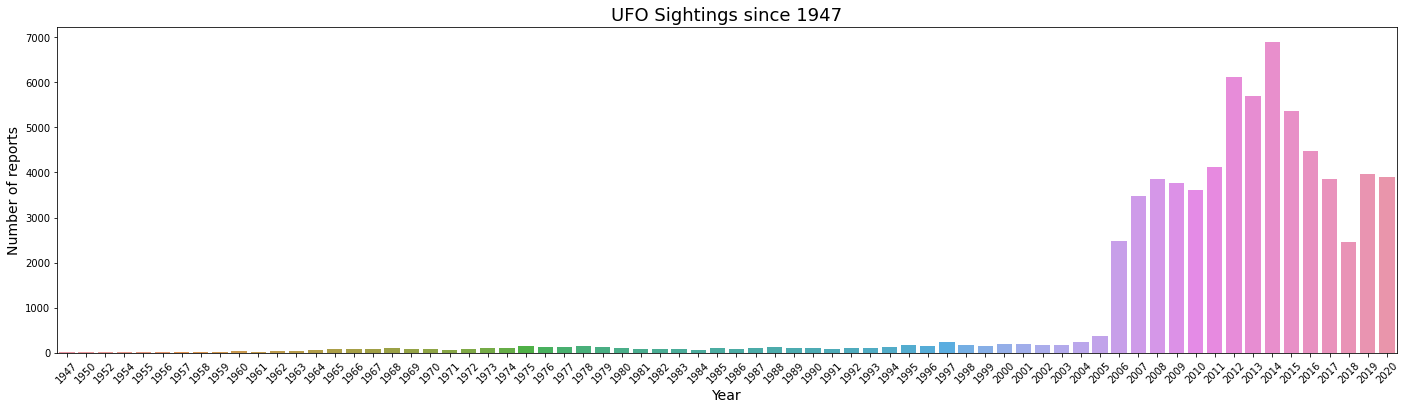

In [ ]:
year_data = df['year'].value_counts()
year_index = year_data.index
year_value = year_data.values
plt.figure(figsize=(24,6))
plt.xticks(rotation = 45)
plt.title("UFO Sightings since 1947", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
year_plot = sns.barplot(x=year_index[:70], y=year_value[:70])

## UFO shapes

In [ ]:
#Consolidate Shape values

df['shape'] = df['shape'].replace('Triangular', 'Triangle')
df['shape'] = df['shape'].replace('TRIANGULAR', 'Triangle')

df['shape'] = df['shape'].replace('Circle', 'Disk')
df['shape'] = df['shape'].replace('Round', 'Disk')

df['shape'] = df['shape'].replace('Changed', 'Changing')
df['shape'] = df['shape'].replace('Other', 'Unknown')

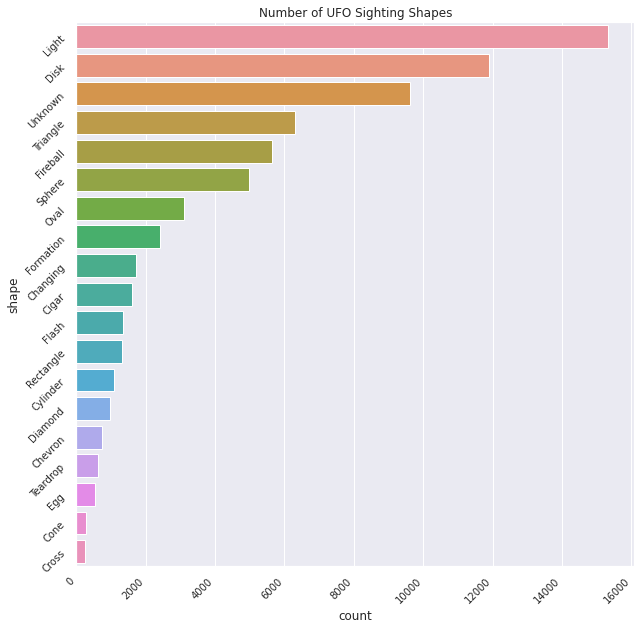

In [ ]:
plt.figure(figsize=(10, 10))

sns.set(style="darkgrid")
sns.countplot(y='shape',data=df , order= df['shape'].value_counts().index)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

plt.yticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

plt.title('Number of UFO Sighting Shapes')

plt.show()

## Months and timing

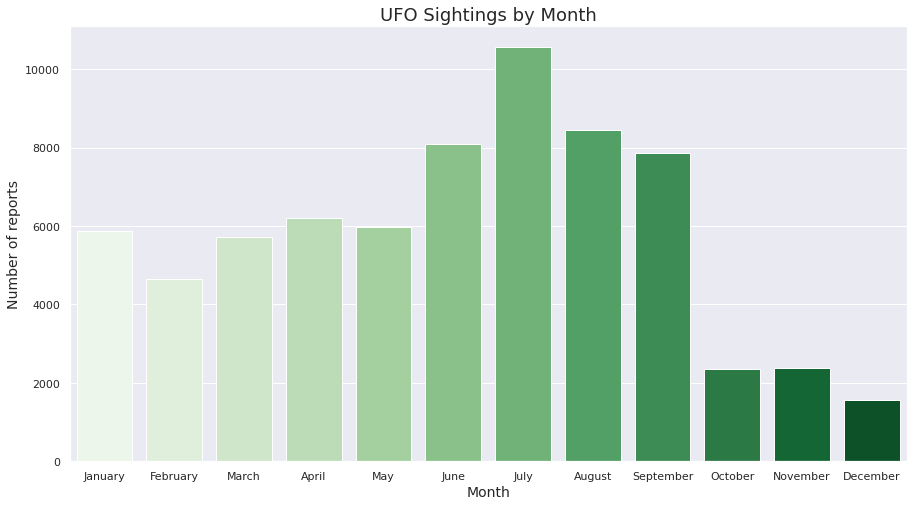

In [ ]:
order = ["January", "February", "March", "April", "May", "June", "July","August", "September", 
         "October", "November", "December"]
df['month'] = df['date_time'].dt.month_name() #turns month numbers into month names
month_data = df['month'].value_counts() 
month_index = month_data.index 
month_values = month_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Month', fontsize=18)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
month_plot = sns.barplot(x=month_index[:60],y=month_values[:60], palette = "Greens", order=order)

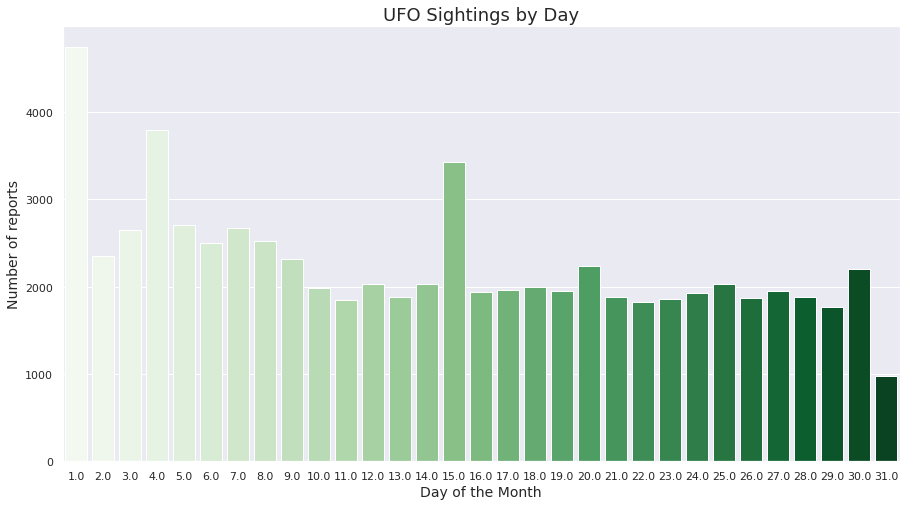

In [ ]:
day_data = df['day'].value_counts() 
day_index = day_data.index 
day_values =day_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Day', fontsize=18)
plt.xlabel("Day of the Month", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
day_plot = sns.barplot(x=day_index[:60],y=day_values[:60], palette = "Greens")

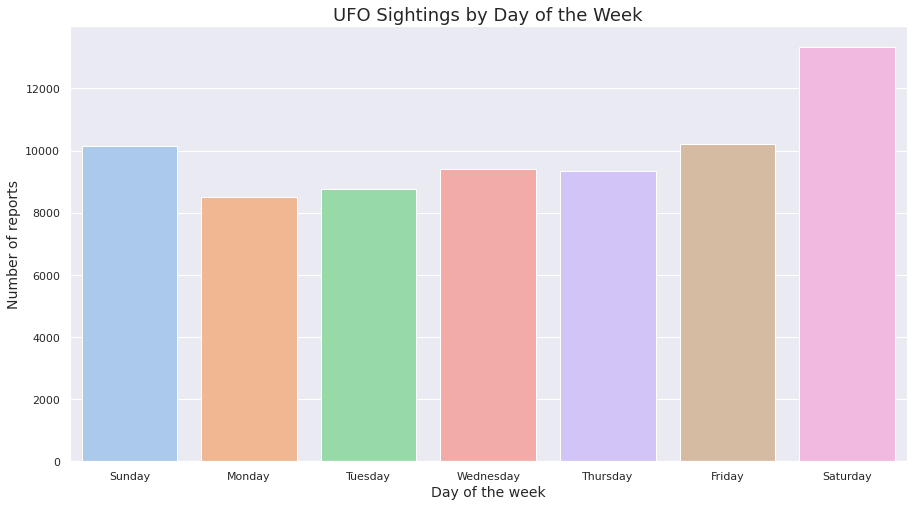

In [ ]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekday_data = df['weekday'].value_counts()
weekday_index = weekday_data.index 
weekday_values = weekday_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Day of the Week', fontsize=18)
plt.xlabel("Day of the week", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
sns.set_palette("pastel")
weekday_plot = sns.barplot(x=weekday_index[:60],y=weekday_values[:60], order = order)

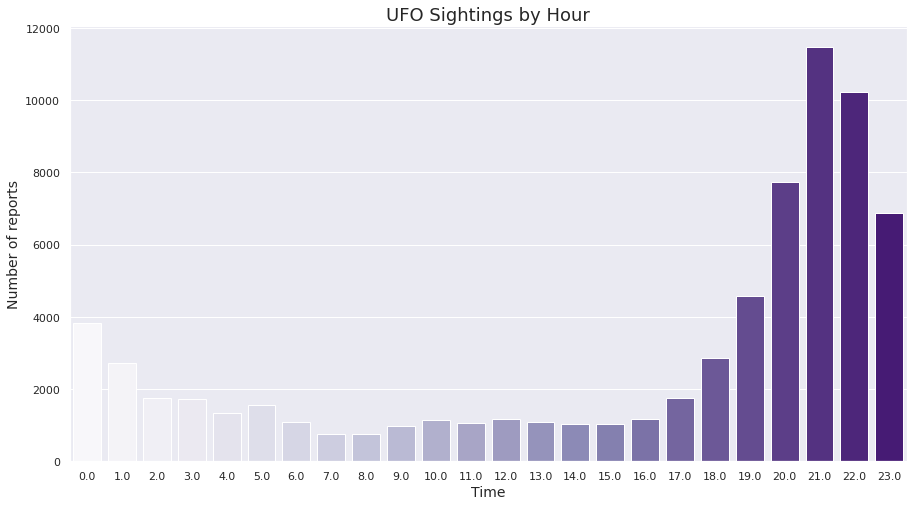

In [ ]:
hour_data = df['hour'].value_counts() 
hour_index = hour_data.index 
hour_values =hour_data.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Hour', fontsize=18)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
hour_plot = sns.barplot(x=hour_index[:60],y=hour_values[:60], palette = 'Purples')

##Reports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read in csv again
#reducing number of features and keeping more of the text for training data

df_text=pd.read_csv('ufo_update.csv')

In [ ]:
df_text.head()

In [ ]:
text = pd.DataFrame(data=df_text['text'])

In [ ]:
#57 null values in text
text.isna().sum()

In [ ]:
text = text.dropna()

In [ ]:
text['length'] = text['text'].apply(len)

In [ ]:
text.head()

In [ ]:
text.length.describe()

In [ ]:
#sample the dataset, too large for colabpi

text_sub = text.sample(frac=.25)

In [ ]:
text_sub.head()

In [ ]:
#!python3 -m spacy download en_core_web_lg

In [ ]:
#!pip install en_core_web_lg

In [ ]:
#!pip install <model_s3_url>
#!pip install en_core_web_lg

In [ ]:
#import spacy
#from spacy.tokenizer import Tokenizer
#import en_core_web_lg

In [ ]:
#dude, finally. I'm not actually using this but I need to save it somewhere

#nlp = en_core_web_lg.load()  

In [ ]:
#tokenizer = Tokenizer(nlp.vocab)

In [ ]:
#tokens = []

#make tokens
"""
for doc in tokenizer.pipe(df['text'], batch_size=500):
  doc_tokens = [token.text for token in doc]
  tokens.append(doc_tokens)
"""

In [ ]:
#print(tokens[100])

In [ ]:
#In this case, I'm removing unusual characters instead of stop words
#this isn't working lmao

#STOPS = ['\t', '\x9d','\xa0','¥','©','«','\xad','®','°','±', '²','º','»','™']

In [ ]:
#update tokens without stops
"""
for doc in tokenizer.pipe(df['text'], batch_size=500):
  doc_tokens = [token.text for token in doc]

  for token in doc:
    if token.is_alpha not in STOPS:
      doc_tokens.append(token)

  tokens.append(doc_tokens)
  """

In [ ]:
# Okay lets try this again w/out cleaning
#using sample

data = ' '.join(text_sub['text'].tolist())

In [ ]:
"""
import re
from bs4 import BeautifulSoup

def cleanText(txt):
    txt = BeautifulSoup(txt).get_text()
    txt = txt.replace('\t', '')
    txt = txt.replace('\x9d', '')
    txt = txt.replace('\xa0', '')
    #remove all non letters from text
    #txt = re.sub("[^a-zA-Z]", " ", txt)
    txt = re.sub("[^A-Za-z0-9_.,!'/$]", " ", txt) 
    #lowercase, split words
    #txt = txt.lower().split()
    txt = txt.split()
    txt = " ".join(txt)

    return txt
"""

In [ ]:
#clean text, add word count coloumn
#what if I just don't clean the text?
"""
df['clean'] = df['text'].apply(cleanText)
df['length_clean'] = df['clean'].apply(len)
df.head()
"""


In [ ]:
#more imports
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import random
import sys
import os

import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print('Length of text: {} characters'.format(len(data)))

In [ ]:
#encode as unique characters

chars = sorted(list(set(data)))

#lookup tables
chars_indices = {c:i for i, c in enumerate(chars)}
indices_char = {i:c for i, c in enumerate(chars)}

In [ ]:
len(chars) #haven't figured out how to get spacy to remove some of these symbols

In [ ]:
chars

In [ ]:
# Create the sequence data

maxlen = 40
step = 5

#encoded = [char_int[c] for c in data]
encoded = [chars_indices[c] for c in data]

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    
    sequences.append(encoded[i : i + maxlen])
    next_char.append(encoded[i + maxlen])
    
print('sequences: ', len(sequences))

In [ ]:
df = pd.read_csv('ufo_update.csv')
text_ = " "

for i in df['text']:
  text_ += i

text_ = text_.split(" ")

text = []
for i in text_:
  text.append(i+" ")

chars = sorted(list(set(text)))
chars_int = dict((c, i) for i, c in enumerate(chars))
int_char = dict((i, c) for i, c in enumerate(chars))

maxlen = 40
step = 5

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(text) - maxlen, step):
    
    sentences.append(text[i : i + maxlen])
    next_char.append(text[i + maxlen])
    
print('sequences: ', len(sequences))

In [ ]:
#need to limit the # of sequences to keep colab from crashing
#wait, is this the problem? because its randomized?

#import random

#subseq = random.sample(sequences, 2000000)

In [ ]:
sequences[0]

In [ ]:
# Create x & y

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequences in enumerate(sequences):
    for t, char in enumerate(sequences):
        x[i,t,char] = 1
        
    y[i, next_char[i]] = 1

print(x.shape)
print(y.shape)

In [ ]:
x[0][0]

In [ ]:
# build the model: a single LSTM
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
#model.add(LSTM(128))
#model.add(Bidirectional(LSTM(128, input_shape=(maxlen, len(chars)))))

model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, chars_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
model.fit(x, y,
          batch_size=128,
          epochs=15,
          callbacks=[print_callback])